In [5]:
import numpy as np # type: ignore
import pandas as pd # type: ignore
import matplotlib.pyplot as plt # type: ignore

In [4]:
# Importing the dataset
dataset = pd.read_csv('cars (dataset for k means).csv')

In [9]:
# Assuming 'dataset' is your DataFrame
X = dataset[dataset.columns[:-1]]  # Select all columns except the last one

# Convert all columns to numeric using 'apply' and 'pd.to_numeric'
X = X.apply(pd.to_numeric, errors='coerce')

# Display the first few rows
print(X.head())

    mpg   cylinders   cubicinches   hp   weightlbs   time-to-60   year
0  14.0           8         350.0  165      4209.0           12   1972
1  31.9           4          89.0   71      1925.0           14   1980
2  17.0           8         302.0  140      3449.0           11   1971
3  15.0           8         400.0  150      3761.0           10   1971
4  30.5           4          98.0   63      2051.0           17   1978


In [10]:
# Eliminate null values
for i in X.columns:
    X[i] = X[i].fillna(int(X[i].mean()))
for i in X.columns:
    print(X[i].isnull().sum())    


0
0
0
0
0
0
0


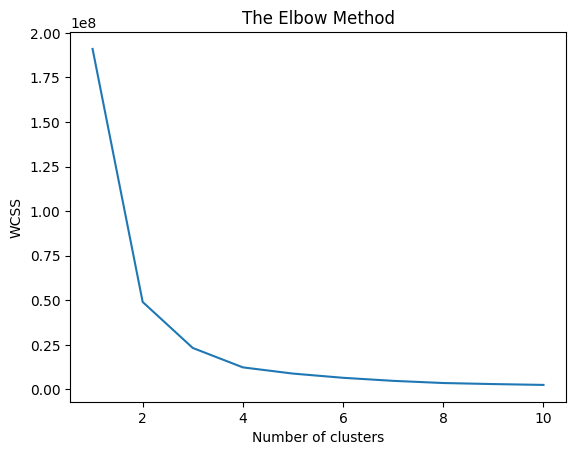

In [12]:
# using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans # type: ignore

wcss = []

for i in range(1, 11):

    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss) 
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [15]:
# Applying KMeans to the dataset / Creating the KMeans classifier
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=42)
y_kmeans = kmeans.fit_predict(X)

# Convert the DataFrame 'X' to a NumPy array
X = X.to_numpy()  # or X.values if you are using an older version of pandas


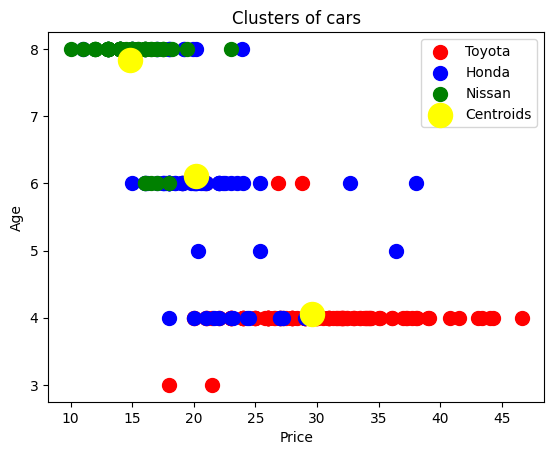

In [17]:
# print(y_kmeans)
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Toyota')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Honda')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Nissan')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of cars')
plt.xlabel('Price')
plt.ylabel('Age')
plt.legend()
plt.show()